# This is binary classification problem

In [1]:
import numpy as np
import pandas as pd
import io

# Load Data

In [2]:
data = pd.read_csv('Ionosphere_data.csv')
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


# check missing values

In [3]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [5]:
data.shape

(351, 35)

In [12]:
data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

# data correlation

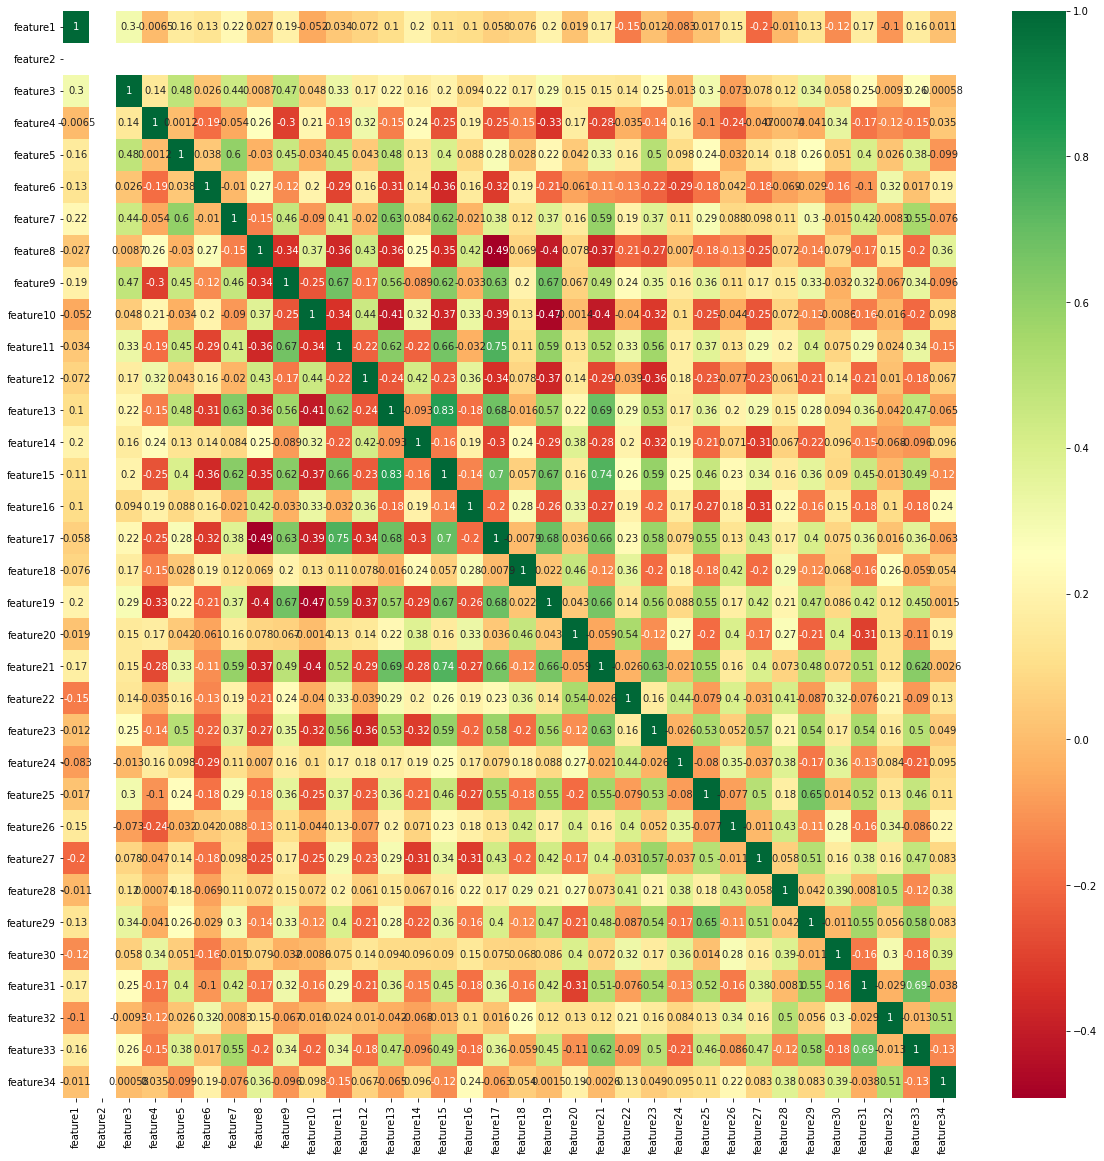

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

# split the data into two form

In [14]:
data['label'] = data['label'].map({'g':1, 'b':0}, inpl)

In [16]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [18]:
X = data.iloc[:, data.columns!='label']
y = data.iloc[:, data.columns=='label']

In [20]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=51)

In [33]:
x_train.shape

(210, 34)

In [34]:
x_test.shape

(141, 34)

In [35]:
y_train.shape

(210, 1)

# standardize the data

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
train_data_sc = sc.fit_transform(x_train)
test_data_sc = sc.fit_transform(x_test)

In [41]:
data.head(n=10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,1
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,1
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0


In [42]:
train_data_sc

array([[ 0.30618622,  0.        , -3.31666559, ..., -2.04435774,
         0.20611128,  2.19768503],
       [ 0.30618622,  0.        , -0.8047537 , ..., -0.02484616,
        -0.71151515,  0.00672473],
       [ 0.30618622,  0.        ,  0.41575414, ..., -0.05595238,
         0.81446533, -0.18759572],
       ...,
       [ 0.30618622,  0.        ,  0.70239343, ..., -0.29482545,
         1.15095151, -0.24288802],
       [-3.26598632,  0.        , -1.30713608, ...,  2.01121215,
        -0.71199767,  0.01308192],
       [-3.26598632,  0.        , -3.31666559, ..., -0.0165728 ,
        -2.64205494, -2.17152118]])

In [43]:
x_train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
184,1,0,-1.00000,-1.00000,-0.50694,1.00000,1.00000,-1.00000,1.00000,0.53819,...,-0.71528,1.00000,0.33333,-1.00000,1.00000,-1.00000,0.69792,-1.00000,0.47569,1.00000
145,1,0,0.25000,0.16667,0.46667,0.26667,0.19036,0.23966,0.07766,0.19939,...,-0.01097,-0.00539,-0.00621,-0.00586,-0.00294,-0.00520,-0.00089,-0.00408,0.00025,-0.00291
161,1,0,0.85736,0.00075,0.81927,-0.05676,0.77521,-0.04182,0.84317,0.09037,...,0.79686,-0.01942,0.82383,-0.03678,0.88125,-0.06423,0.73936,-0.01942,0.79089,-0.09186
225,1,0,0.92308,0.15451,0.86399,0.29757,0.72582,0.36790,0.70588,0.56830,...,-0.29291,0.65708,-0.38798,0.58553,-0.46799,0.50131,-0.53146,0.40732,-0.56231,0.35095
138,1,0,-0.26667,0.40000,-0.27303,0.12159,-0.17778,-0.04444,0.06192,-0.06879,...,-0.00069,-0.00050,0.00019,-0.00043,0.00026,0.00005,0.00000,0.00015,-0.00008,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,0,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,...,1.00000,-1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000
16,1,0,0.99645,0.06468,1.00000,-0.01236,0.97811,0.02498,0.96112,0.02312,...,0.81329,0.13412,0.79476,0.13638,0.79110,0.15379,0.77122,0.15930,0.70941,0.12015
197,1,0,1.00000,0.23058,1.00000,-0.78509,1.00000,-0.10401,1.00000,0.15414,...,1.00000,-0.01253,0.96238,-0.04597,0.91165,0.03885,1.00000,-0.13722,0.96523,-0.11717
224,0,0,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,...,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,0.00000


In [44]:
sc.mean_

array([ 0.85815603,  0.        ,  0.62774865,  0.05476383,  0.61193979,
        0.0907244 ,  0.54298   ,  0.14247206,  0.50349184,  0.22064255,
        0.47407794,  0.15834539,  0.35545809,  0.09037206,  0.29844461,
        0.11376057,  0.3829395 , -0.00913851,  0.26753475, -0.04507376,
        0.28169695,  0.02388298,  0.33757532, -0.08844163,  0.36914333,
       -0.10543255,  0.49918355,  0.00424936,  0.35717362, -0.01777418,
        0.35292035, -0.02161638,  0.3202673 ,  0.04496489])

In [45]:
sc.scale_

array([0.34889004, 1.        , 0.49574723, 0.49276714, 0.47061785,
       0.50093006, 0.44804839, 0.53311289, 0.4865323 , 0.50456887,
       0.55245103, 0.54476998, 0.62442538, 0.54526064, 0.65435974,
       0.49688986, 0.61480608, 0.53358664, 0.66425406, 0.54859123,
       0.60656869, 0.52044477, 0.60098316, 0.54522407, 0.6043094 ,
       0.54890569, 0.57779695, 0.58197684, 0.59471494, 0.56007922,
       0.57803997, 0.54035399, 0.52618273, 0.48045279])

In [47]:
x_train.describe().round(2)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,210.00,210.0,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,...,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,0.91,0.0,0.65,0.04,0.59,0.13,0.55,0.10,0.52,0.15,...,0.41,-0.05,0.57,-0.12,0.39,-0.03,0.35,0.01,0.37,-0.01
std,0.28,0.0,0.50,0.40,0.55,0.43,0.52,0.51,0.52,0.47,...,0.56,0.48,0.47,0.52,0.56,0.47,0.57,0.49,0.52,0.46
min,0.00,0.0,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,1.00,0.0,0.50,-0.06,0.44,-0.02,0.28,-0.06,0.11,-0.06,...,0.00,-0.27,0.34,-0.47,0.00,-0.22,0.00,-0.23,0.00,-0.21
50%,1.00,0.0,0.88,0.01,0.81,0.03,0.77,0.01,0.71,0.02,...,0.57,-0.02,0.72,-0.03,0.53,0.00,0.46,0.00,0.45,0.00
75%,1.00,0.0,1.00,0.17,1.00,0.30,0.98,0.38,0.95,0.45,...,0.90,0.14,0.97,0.09,0.88,0.10,0.84,0.18,0.83,0.13
max,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [49]:
df_sc = pd.DataFrame(train_data_sc)
df_sc

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.306186,0.0,-3.316666,-2.580477,-2.004320,2.017777,0.857175,-2.162562,0.929493,0.821704,...,-2.023302,2.198439,-0.507286,-1.693162,1.082419,-2.061154,0.611102,-2.044358,0.206111,2.197685
1,0.306186,0.0,-0.804754,0.321568,-0.231438,0.311514,-0.701935,0.266083,-0.847160,0.095264,...,-0.761695,0.089774,-1.234612,0.217614,-0.705249,0.063013,-0.624275,-0.024846,-0.711515,0.006725
2,0.306186,0.0,0.415754,-0.091152,0.410625,-0.441021,0.424301,-0.285371,0.627400,-0.138491,...,0.685343,0.060348,0.543411,0.158184,0.870756,-0.063032,0.684361,-0.055952,0.814465,-0.187596
3,0.306186,0.0,0.547820,0.291320,0.492057,0.383410,0.329191,0.517321,0.362946,0.886265,...,-1.266725,1.479212,-2.052399,1.354289,-1.534166,1.144549,-1.562232,0.809385,-1.797288,0.779768
4,0.306186,0.0,-1.843017,0.901967,-1.578385,-0.026048,-1.410856,-0.290503,-0.877480,-0.479755,...,-0.743281,0.100030,-1.220903,0.228051,-0.699545,0.074223,-0.622702,-0.016269,-0.712152,0.013126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-3.265986,0.0,0.702393,-2.580477,0.739723,2.017777,0.857175,-2.162562,0.929493,1.811896,...,1.049221,-1.996281,0.920783,-1.693162,1.082419,2.209387,1.145128,-2.044358,1.218060,2.197685
206,0.306186,0.0,0.695260,0.067872,0.739723,-0.337714,0.815022,-0.154501,0.854601,-0.282686,...,0.714773,0.382377,0.481140,0.491005,0.710070,0.402500,0.740684,0.306453,0.657204,0.275562
207,0.306186,0.0,0.702393,0.480541,0.739723,-2.135650,0.857175,-0.407208,0.929493,-0.001759,...,1.049221,0.074799,0.840198,0.140521,0.924942,0.157072,1.145128,-0.294825,1.150952,-0.242888
208,-3.265986,0.0,-1.307136,-0.093017,0.739723,2.017777,-1.068508,-0.203440,0.929493,1.811896,...,-0.742045,0.101079,0.920783,-1.693162,-0.700008,0.074117,-2.390531,2.011212,-0.711998,0.013082


# Built_model

In [50]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [56]:
def creat_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(34,)))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [57]:
model = creat_model()

In [58]:
history = model.fit(train_data_sc, y_train, epochs=100)
history

Epoch 1/100
7/7 [==============================] - 3s 13ms/step - loss: 1.1024 - accuracy: 0.4272
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8360 - accuracy: 0.6784
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8400 - accuracy: 0.6863
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7223 - accuracy: 0.7423
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7124 - accuracy: 0.7442
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6246 - accuracy: 0.7654
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.7854
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.8037
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.8151
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.8325
Epoch 11/100
7/7 [==========

7/7 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9717
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9836
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9867
Epoch 87/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9769
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9690
Epoch 89/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9690
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9828
Epoch 91/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9801
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9726
Epoch 93/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9739
Epoch 94/100
7/7 [===============

In [66]:
test_loss, test_accuracy = model.evaluate(test_data_sc, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8723


In [67]:
print(test_accuracy)

0.8723404407501221


In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                560       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [71]:
test_data_sc[21]

array([ 0.40655781,  0.        , -0.47380729,  0.95186171, -2.97519484,
        0.04530693, -1.58299867, -1.69992524,  0.33539018, -0.41370478,
        0.62874724,  0.4523278 , -1.6459262 ,  0.39782432, -0.98785816,
       -1.51027546,  0.13231895,  0.30716382,  0.4216538 ,  0.19065883,
       -1.31888929,  0.81800614, -1.35458923, -0.71071398, -0.07895514,
        1.47167823,  0.03552538,  0.66021637,  0.36026736,  0.73317162,
       -1.56015225, -0.51361445, -0.12516052, -1.25576311])